# Pendulum plot
we try to plot a pendulum motion with the gyro sensor.

This will allow us to better understand how it works

## connection setup

In [174]:
import random, heapq, rpyc
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
import time



conn = rpyc.classic.connect("ev3dev.local") # host name or IP address of the EV3
ev3 = conn.modules['ev3dev2']      # import ev3dev2.ev3 remotely

legosensors=conn.modules['ev3dev2.sensor.lego']
sensor_controls=conn.modules['ev3dev2.sensor']
sound=conn.modules['ev3dev2.sound']
led_controls=conn.modules['ev3dev2.led']
motor=conn.modules['ev3dev2.motor']

led=led_controls.Leds()
sound=sound.Sound()

In [175]:
out2 = sensor_controls.INPUT_2

gyro      = legosensors.GyroSensor(out2)

## Set up correct gyro mode and take initial measurments

In [176]:
gyro.mode="GYRO-ANG"

In [125]:
def reset_angle(gyro):
    gyro.mode="GYRO-ANG"
    gyro.mode="GYRO-FAS"
    gyro.mode="GYRO-ANG"

In [147]:
reset_angle(gyro)
gyro.rate_and_angle

(0, -15)

In [197]:
gyro.rate_and_angle

(-3, 0)

## measure continouusly for 10 s

In [194]:
t0 = time.time()

while time.time() - t0 < 10:
    angle, rate = gyro.rate_and_angle
    
    display.clear_output(wait=True)
    display.display(angle, rate)

-2

0

## take measurements and plot

In [195]:
timesteps = []
angles = []
speed= []

t0 = time.time()

while time.time() - t0 < 15:
    angle, rate = gyro.rate_and_angle
    t = time.time() - t0
    timesteps.append(t)
    angles.append(angle)
    speed.append(rate)

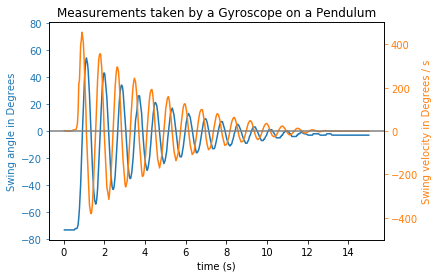

In [203]:
timesteps = np.array(timesteps)
angles = np.array(angles)
maxangle = max(abs(angles))
speed= np.array(speed)
maxspeed = max(abs(speed))

c0 = '#1f77b4'
c1 = '#ff7f0e'
fig, ax1 = plt.subplots()
ax1.plot(timesteps, angles, label="Swing Angle in Degrees", color=c0)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Swing angle in Degrees', color=c0)
ax1.tick_params('y', colors=c0)
ax1.set_ylim(-maxangle * 1.1 , maxangle * 1.1)
ax2 = ax1.twinx()
ax2.plot(timesteps, speed, label="Swing Velocity, in degrees / s", color=c1)
ax2.set_ylabel('Swing velocity in Degrees / s', color=c1)
ax2.tick_params('y', colors=c1)
ax2.set_ylim(-maxspeed * 1.1, maxspeed * 1.1)
plt.axhline(0, color='gray')
plt.xlabel("time $t$ in s")
plt.title('Measurements taken by a Gyroscope on a Pendulum')
plt.savefig('pendulum.pdf')
plt.show()